In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
plt.switch_backend('agg')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools

from matplotlib import pyplot as plt

#%matplotlib inline
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
#tf.enable_eager_execution()
import healpy as hp


In [2]:
import numpy as np
import pandas as pd
from SampleFileTools1 import SampleFile

import numpy as np
import pandas as pd
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn
import itertools
#from tensorflow_addons.optimizers import CyclicalLearningRate
#import matplotlib as mpl
#mpl.style.use('seaborn')

# Reading the SNR time series hdf files for training

import random
import os


In [3]:
import h5py

f1 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_snr_series_GW170817_training_1.hdf', 'r')
f2 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_snr_series_GW170817_training_2.hdf', 'r')
f3 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_snr_series_GW170817_training_3.hdf', 'r')

#Get the HDF5 group
group1 = f1['omf_injection_snr_samples']
group2 = f2['omf_injection_snr_samples']
group3 = f3['omf_injection_snr_samples']

data_h1_1 = group1['h1_snr']
data_h1_2 = group2['h1_snr']
data_h1_3 = group3['h1_snr']

data_l1_1 = group1['l1_snr']
data_l1_2 = group2['l1_snr']
data_l1_3 = group3['l1_snr']

data_v1_1 = group1['v1_snr']
data_v1_2 = group2['v1_snr']
data_v1_3 = group3['v1_snr']

h1_real = np.zeros((100000,410))
l1_real = np.zeros((100000,410))
v1_real = np.zeros((100000,410))

h1_imag = np.zeros((100000,410))
l1_imag = np.zeros((100000,410))
v1_imag = np.zeros((100000,410))


for i in range(30000):
    h1_real[i] = abs(data_h1_1[str(i)][()][1840:2250])
    l1_real[i] = abs(data_l1_1[str(i)][()][1840:2250])
    v1_real[i] = abs(data_v1_1[str(i)][()][1840:2250])
    
    h1_imag[i] = np.imag(data_h1_1[str(i)][()][1840:2250])
    l1_imag[i] = np.imag(data_l1_1[str(i)][()][1840:2250])
    v1_imag[i] = np.imag(data_v1_1[str(i)][()][1840:2250])

    
for i,j in zip(range(30000,70000), range(40000)):
    h1_real[i] = abs(data_h1_2[str(j)][()][1840:2250])
    l1_real[i] = abs(data_l1_2[str(j)][()][1840:2250])
    v1_real[i] = abs(data_v1_2[str(j)][()][1840:2250])
    
    h1_imag[i] = np.imag(data_h1_2[str(j)][()][1840:2250])
    l1_imag[i] = np.imag(data_l1_2[str(j)][()][1840:2250])
    v1_imag[i] = np.imag(data_v1_2[str(j)][()][1840:2250])

for i,j in zip(range(70000,100000), range(30000)):
    h1_real[i] = abs(data_h1_3[str(j)][()][1840:2250])
    l1_real[i] = abs(data_l1_3[str(j)][()][1840:2250])
    v1_real[i] = abs(data_v1_3[str(j)][()][1840:2250])
    
    h1_imag[i] = np.imag(data_h1_3[str(j)][()][1840:2250])
    l1_imag[i] = np.imag(data_l1_3[str(j)][()][1840:2250])
    v1_imag[i] = np.imag(data_v1_3[str(j)][()][1840:2250])

f1.close()
f2.close()
f3.close()


In [4]:
# Reading RA and Decs from training set

ra = np.loadtxt('/fred/oz016/Chayan/SNR_time_series_sample_files/RA_GW170817_training.txt')
dec = np.loadtxt('/fred/oz016/Chayan/SNR_time_series_sample_files/Dec_GW170817_training.txt')

from SampleFileTools1 import SampleFile

#dec = -dec + np.pi/2.0

# Reading test set data

#f_test = h5py.File('SNR_time_series_sample_files/default_GW170817_injection_run_parameters.hdf', 'r')

f_test = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_GW170817_injection_run_parameters_NSBH.hdf', 'r')

data_ra = f_test['ra'][()]
data_dec = f_test['dec'][()]
#data_v1_test = group_test['v1_snr']
    
f_test.close()

ra_test = 2.0*np.pi*data_ra
dec_test = np.arcsin(1.0 - 2.0*data_dec)

#dec_test = -dec_test + np.pi/2.0

#f3 = h5py.File('samplegen/output/default_snr_series_GW170817_snr_test_injection_run.hdf', 'r')

f3 = h5py.File('/fred/oz016/Chayan/samplegen/output/default_snr_series_GW170817_snr_test_injection_run_test_NSBH.hdf', 'r')

#Get the HDF5 group
#group1 = f1['omf_injection_snr_samples']
#group2 = f2['omf_injection_snr_samples']
group3 = f3['omf_injection_snr_samples']

#data_h1_1 = group1['h1_snr']
#data_h1_2 = group2['h1_snr']
data_h1_3 = group3['h1_snr']

#data_l1_1 = group1['l1_snr']
#data_l1_2 = group2['l1_snr']
data_l1_3 = group3['l1_snr']

#data_v1_1 = group1['v1_snr']
#data_v1_2 = group2['v1_snr']
data_v1_3 = group3['v1_snr']

num_test_samples = 2000

index = np.arange(num_test_samples) 

existing_index = [i for i in index if str(i) in data_h1_3.keys()]   

h1_test_real = np.zeros((len(existing_index),410))
l1_test_real = np.zeros((len(existing_index),410))
v1_test_real = np.zeros((len(existing_index),410))

h1_test_imag = np.zeros((len(existing_index),410))
l1_test_imag = np.zeros((len(existing_index),410))
v1_test_imag = np.zeros((len(existing_index),410))

ra_test_new = np.zeros(len(existing_index))
dec_test_new = np.zeros(len(existing_index))

for i,j in zip(range(len(existing_index)),existing_index):
    h1_test_real[i] = abs(data_h1_3[str(j)][()][1840:2250])
    l1_test_real[i] = abs(data_l1_3[str(j)][()][1840:2250])
    v1_test_real[i] = abs(data_v1_3[str(j)][()][1840:2250])
    
    h1_test_imag[i] = np.imag(data_h1_3[str(j)][()][1840:2250])
    l1_test_imag[i] = np.imag(data_l1_3[str(j)][()][1840:2250])
    v1_test_imag[i] = np.imag(data_v1_3[str(j)][()][1840:2250])
    
    ra_test_new[i] = ra_test[j]
    dec_test_new[i] = dec_test[j]


h1_real = h1_real[:,:,None]
l1_real = l1_real[:,:,None]
v1_real = v1_real[:,:,None]

h1_imag = h1_imag[:,:,None]
l1_imag = l1_imag[:,:,None]
v1_imag = v1_imag[:,:,None]

X_train_real = np.concatenate((h1_real, l1_real, v1_real), axis=2)
X_train_imag = np.concatenate((h1_imag, l1_imag, v1_imag), axis=2)

h1_test_real = h1_test_real[:,:,None]
l1_test_real = l1_test_real[:,:,None]
v1_test_real = v1_test_real[:,:,None]

h1_test_imag = h1_test_imag[:,:,None]
l1_test_imag = l1_test_imag[:,:,None]
v1_test_imag = v1_test_imag[:,:,None]

X_test_real = np.concatenate((h1_test_real, l1_test_real, v1_test_real), axis=2)
X_test_imag = np.concatenate((h1_test_imag, l1_test_imag, v1_test_imag), axis=2)


In [5]:
ra = ra[:,None]
dec = dec[:,None]

y_train = np.concatenate((ra, dec), axis=1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(y_train)

ra_test_new = ra_test_new[:,None]
dec_test_new = dec_test_new[:,None]

y_test = np.concatenate((ra_test_new, dec_test_new), axis=1)

y_test = sc.transform(y_test)

f3.close()

# Convert type for Keras otherwise Keras cannot process the data
X_train_real = X_train_real.astype("float32")
X_train_imag = X_train_imag.astype("float32")
y_train = y_train.astype("float32")

X_test_real = X_test_real.astype("float32")
X_test_imag = X_test_imag.astype("float32")
y_test = y_test.astype("float32")


In [35]:
import tensorflow as tf
import tensorflow_probability as tfp
import re
tfd = tfp.distributions
tfb = tfp.bijectors

#kernels = 32
#stride = 1

class ResidualUnit(tf.keras.layers.Layer):
    def __init__(self, filters, strides, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        
        self.main_layers = [
            tf.keras.layers.Conv1D(filters, 3, strides=strides, padding='same', use_bias=False),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            tf.keras.layers.Conv1D(filters, 3, strides=1, padding='same', use_bias=False),
            tf.keras.layers.BatchNormalization()]
        
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                tf.keras.layers.Conv1D(filters, 1, strides=strides, padding='same', use_bias=False),
                tf.keras.layers.BatchNormalization()]
    
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        print(self.skip_layers)
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
    
        
input1 = tf.keras.layers.Input([410,3])
X = tf.keras.layers.Conv1D(64, kernel_size=7, strides=2, padding='same', use_bias=False)(input1)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Activation("relu")(X)
X = tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same')(X)

prev_filters = 64

for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    if filters == prev_filters:
        strides = 1
    else:
        strides = 2
    print(strides)
    X = ResidualUnit(filters, strides=strides)(X)
    prev_filters = filters

X = tf.keras.layers.GlobalAvgPool1D()(X)
flat1 = tf.keras.layers.Flatten()(X)

input2 = tf.keras.layers.Input([410,3])
X = tf.keras.layers.Conv1D(64, kernel_size=7, strides=2, padding='same', use_bias=False)(input2)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Activation("relu")(X)
X = tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same')(X)

prev_filters = 64

for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    if filters == prev_filters:
        strides = 1
    else:
        strides = 2
    print(strides)
    X = ResidualUnit(filters, strides=strides)(X)
    prev_filters = filters

X = tf.keras.layers.GlobalAvgPool1D()(X)
flat2 = tf.keras.layers.Flatten()(X)

# merge input models
merge = tf.keras.layers.concatenate([flat1, flat2])
    
# Define the trainable distribution
def make_masked_autoregressive_flow(index, hidden_units, activation, conditional_event_shape):
    
    made = tfp.bijectors.AutoregressiveNetwork(params=2,
              hidden_units=hidden_units,
              event_shape=(2,),
              activation=activation,
              conditional=True,
              kernel_initializer=tf.keras.initializers.VarianceScaling(0.1),
              conditional_event_shape=conditional_event_shape)
    
    return tfp.bijectors.MaskedAutoregressiveFlow(shift_and_log_scale_fn = made, name='maf'+str(index))

def make_bijector_kwargs(bijector, name_to_kwargs):
    
    if hasattr(bijector, 'bijectors'):
        
        return {b.name: make_bijector_kwargs(b, name_to_kwargs) for b in bijector.bijectors}
    
    else:
        for name_regex, kwargs in name_to_kwargs.items():
            if re.match(name_regex, bijector.name):
                return kwargs
    return {}
    
        
#input1 = tf.keras.layers.Input([410,2])
#input2 = tf.keras.layers.Input([410,2])
x_ = tf.keras.layers.Input(shape=y_train.shape[-1], dtype=tf.float32)
        
# Define a more expressive model
num_bijectors = 6
bijectors = []

for i in range(num_bijectors):
    
    masked_auto_i = make_masked_autoregressive_flow(i, hidden_units = [256, 256], activation = 'relu',
                                        conditional_event_shape=merge.shape[-1])
    bijectors.append(masked_auto_i)
    
    USE_BATCHNORM = True
    
    if USE_BATCHNORM and i % 2 == 0:
    # BatchNorm helps to stabilize deep normalizing flows, esp. Real-NVP
        bijectors.append(tfb.BatchNormalization(name='batch_normalization'+str(i)))
    
    bijectors.append(tfb.Permute(permutation = [1, 0]))
    flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))
            
# Define the trainable distribution
trainable_distribution = tfd.TransformedDistribution(distribution=tfd.MultivariateNormalDiag(loc=tf.zeros(2)),
                bijector = flow_bijector)

log_prob_ = trainable_distribution.log_prob(x_, bijector_kwargs=
                make_bijector_kwargs(trainable_distribution.bijector, 
                                     {'maf.': {'conditional_input':merge}}))

model = tf.keras.Model([input1, input2, x_], log_prob_)
encoder = tf.keras.Model([input1, input2], merge)  
    
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)  # optimizer
checkpoint = tf.train.Checkpoint(optimizer=opt, model=model)
    
# load best model with min validation loss
#    checkpoint.restore('NSBH_3_det/tmp_0x7232a60c/ckpt-1')
#    encoder.load_weights("NF_encoder.hdf5")

model.compile(optimizer=tf.optimizers.Adam(lr=1e-4), loss=lambda _, log_prob: -log_prob)


1
ListWrapper([])
1
ListWrapper([])
1
ListWrapper([])
2
ListWrapper([<tensorflow.python.keras.layers.convolutional.Conv1D object at 0x7f8f2d5f2190>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8f2d7f1e10>])


ValueError: in user code:

    <ipython-input-35-0c34449f1010>:35 call  *
        return self.activation(Z + skip_Z)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:1180 binary_op_wrapper
        raise e
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:1164 binary_op_wrapper
        return func(x, y, name=name)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:1486 _add_dispatch
        return gen_math_ops.add_v2(x, y, name=name)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py:482 add_v2
        "AddV2", x=x, y=y, name=name)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:592 _create_op_internal
        compute_device)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3536 _create_op_internal
        op_def=op_def)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:2016 __init__
        control_input_ops, op_def)
    /fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 52 and 103 for '{{node residual_unit_27/add}} = AddV2[T=DT_FLOAT](residual_unit_27/batch_normalization_71/batchnorm/add_1, residual_unit_27/batch_normalization_72/batchnorm/add_1)' with input shapes: [?,52,128], [?,103,128].


In [7]:
input1 = tf.keras.layers.Input([410,3])
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=1)(input1)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=2)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=4)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=8)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=1)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=2)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=4)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=8)(X)
X = tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=4, padding='same')(X)
X = tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=4, padding='same')(X)

flat1 = tf.keras.layers.Flatten()(X)

input2 = tf.keras.layers.Input([410,3])
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=1)(input2)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=2)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=4)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=8)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=1)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=2)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=4)(X)
X = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='causal', 
                               activation='relu', dilation_rate=8)(X)
X = tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=4, padding='same')(X)
X = tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=4, padding='same')(X)


flat2 = tf.keras.layers.Flatten()(X)

# merge input models
merge = tf.keras.layers.concatenate([flat1, flat2])
    
# Define the trainable distribution
def make_masked_autoregressive_flow(index, hidden_units, activation, conditional_event_shape):
    
    made = tfp.bijectors.AutoregressiveNetwork(params=2,
              hidden_units=hidden_units,
              event_shape=(2,),
              activation=activation,
              conditional=True,
              kernel_initializer=tf.keras.initializers.VarianceScaling(0.1),
              conditional_event_shape=conditional_event_shape)
    
    return tfp.bijectors.MaskedAutoregressiveFlow(shift_and_log_scale_fn = made, name='maf'+str(index))

def make_bijector_kwargs(bijector, name_to_kwargs):
    
    if hasattr(bijector, 'bijectors'):
        
        return {b.name: make_bijector_kwargs(b, name_to_kwargs) for b in bijector.bijectors}
    
    else:
        for name_regex, kwargs in name_to_kwargs.items():
            if re.match(name_regex, bijector.name):
                return kwargs
    return {}
    
        
#input1 = tf.keras.layers.Input([410,2])
#input2 = tf.keras.layers.Input([410,2])
x_ = tf.keras.layers.Input(shape=y_train.shape[-1], dtype=tf.float32)
        
# Define a more expressive model
num_bijectors = 6
bijectors = []

for i in range(num_bijectors):
    
    masked_auto_i = make_masked_autoregressive_flow(i, hidden_units = [256, 256], activation = 'relu',
                                        conditional_event_shape=merge.shape[-1])
    bijectors.append(masked_auto_i)
    
    USE_BATCHNORM = True
    
    if USE_BATCHNORM and i % 2 == 0:
    # BatchNorm helps to stabilize deep normalizing flows, esp. Real-NVP
        bijectors.append(tfb.BatchNormalization(name='batch_normalization'+str(i)))
    
    bijectors.append(tfb.Permute(permutation = [1, 0]))
    flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))
            
# Define the trainable distribution
trainable_distribution = tfd.TransformedDistribution(distribution=tfd.MultivariateNormalDiag(loc=tf.zeros(2)),
                bijector = flow_bijector)

log_prob_ = trainable_distribution.log_prob(x_, bijector_kwargs=
                make_bijector_kwargs(trainable_distribution.bijector, 
                                     {'maf.': {'conditional_input':merge}}))

model = tf.keras.Model([input1, input2, x_], log_prob_)
encoder = tf.keras.Model([input1, input2], merge)  
    
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)  # optimizer
checkpoint = tf.train.Checkpoint(optimizer=opt, model=model)
    
# load best model with min validation loss
#    checkpoint.restore('NSBH_3_det/tmp_0x7232a60c/ckpt-1')
#    encoder.load_weights("NF_encoder.hdf5")

model.compile(optimizer=tf.optimizers.Adam(lr=1e-4), loss=lambda _, log_prob: -log_prob)


/fred/oz016/Chayan/tensorflow2.4/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [8]:
#model,dist = Normalizing_Flows_model().make_distribution(410,2)

class CustomCheckpoint(tf.keras.callbacks.Callback):

    def __init__(self, filepath, encoder):
        self.monitor = 'val_loss'
        self.monitor_op = np.less
        self.best = np.Inf

        self.filepath = filepath
        self.encoder = encoder

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if self.monitor_op(current, self.best):
            self.best = current
            # self.encoder.save_weights(self.filepath, overwrite=True)
            self.encoder.save(self.filepath, overwrite=True) # Whichever you prefer
        
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 410, 3)]     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 410, 3)]     0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 410, 32)      320         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 410, 32)      320         input_2[0][0]                    
______________________________________________________________________________________________

In [25]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
#checkpoint_cb = keras.callbacks.ModelCheckpoint("Models/ResNet_MDN.h5", save_best_only=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=15)

#custom_checkpoint = CustomCheckpoint(filepath='/fred/oz016/Chayan/MAF/GW_localization_MAF/NF_encoder_3_det.hdf5',encoder=encoder)

# initialize checkpoints
#dataset_name = "NSBH_3_det"
#checkpoint_directory = "{}/tmp_{}".format(dataset_name, str(hex(random.getrandbits(32))))
#checkpoint_prefix = os.path.join(checkpoint_directory, "ckpt")

#opt = tf.keras.optimizers.Adam(learning_rate=1e-5)  # optimizer
#checkpoint = tf.train.Checkpoint(optimizer=opt, model=model)

#callbacks_list=[custom_checkpoint]  

batch_size = 2000

model.fit([X_train_real,X_train_imag,y_train], np.zeros((len(X_train_real), 0), dtype=np.float32),
          batch_size=batch_size,
          epochs=500,
          validation_split=0.2,
          shuffle=True,
          verbose=True)

#checkpoint.save(file_prefix=checkpoint_prefix)

#encoder.load_weights("/fred/oz016/Chayan/MAF/GW_localization_MAF/NF_encoder_3_det.hdf5")


Epoch 1/500
40/40 [==============================] - 16s 408ms/step - loss: -3.2759 - val_loss: -2.9837
Epoch 2/500
40/40 [==============================] - 16s 408ms/step - loss: -3.2814 - val_loss: -3.1131
Epoch 3/500
40/40 [==============================] - 16s 410ms/step - loss: -3.3092 - val_loss: -2.9722
Epoch 4/500
40/40 [==============================] - 16s 409ms/step - loss: -3.2771 - val_loss: -3.0783
Epoch 5/500
40/40 [==============================] - 16s 408ms/step - loss: -3.3715 - val_loss: -3.1297
Epoch 6/500
40/40 [==============================] - 16s 410ms/step - loss: -3.4061 - val_loss: -2.9545
Epoch 7/500
40/40 [==============================] - 16s 409ms/step - loss: -3.4580 - val_loss: -3.1569
Epoch 8/500
40/40 [==============================] - 16s 409ms/step - loss: -3.4234 - val_loss: -3.1812
Epoch 9/500
40/40 [==============================] - 16s 409ms/step - loss: -3.5073 - val_loss: -3.2912
Epoch 10/500
40/40 [==============================] - 16s 408ms/

40/40 [==============================] - 16s 410ms/step - loss: -6.3494 - val_loss: -5.2857
Epoch 80/500
40/40 [==============================] - 16s 409ms/step - loss: -6.4211 - val_loss: -5.1475
Epoch 81/500
40/40 [==============================] - 17s 416ms/step - loss: -6.5123 - val_loss: -5.1077
Epoch 82/500
40/40 [==============================] - 16s 409ms/step - loss: -6.3642 - val_loss: -5.3488
Epoch 83/500
40/40 [==============================] - 16s 410ms/step - loss: -6.4520 - val_loss: -5.4460
Epoch 84/500
40/40 [==============================] - 16s 409ms/step - loss: -6.5989 - val_loss: -5.3498
Epoch 85/500
40/40 [==============================] - 16s 410ms/step - loss: -6.7322 - val_loss: -5.4542
Epoch 86/500
40/40 [==============================] - 16s 409ms/step - loss: -6.7136 - val_loss: -5.1318
Epoch 87/500
40/40 [==============================] - 16s 408ms/step - loss: -6.4926 - val_loss: -5.4871
Epoch 88/500
40/40 [==============================] - 16s 409ms/step

KeyboardInterrupt: 

In [26]:
#encoder.load_weights("/fred/oz016/Chayan/MAF/GW_localization_MAF/NF_encoder_3_det.hdf5")

from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture

def kde2D(x, y, bandwidth, ra_pix, de_pix, xbins=150j, ybins=150j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
#    xx, yy = np.mgrid[x.min():x.max():xbins, 
#                      y.min():y.max():ybins]

    xy_sample = np.vstack([de_pix, ra_pix]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(kernel='gaussian', bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)
#    gm = GaussianMixture(n_components=10, random_state=0).fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return z

nside=32
npix=hp.nside2npix(nside)
theta,phi = hp.pixelfunc.pix2ang(nside,np.arange(npix))

# ra_pix and de_pix are co-ordinates in the skuy where I want to find the probabilities
ra_pix = phi
de_pix = -theta + np.pi/2.0 

probs = []
n_samples = 5000

for i in range(12):
    x_test_real = np.expand_dims(X_test_real[i],axis=0)
    x_test_imag = np.expand_dims(X_test_imag[i],axis=0)
    
    preds = encoder.predict([x_test_real,x_test_imag])
    
    samples = trainable_distribution.sample((n_samples,),
      bijector_kwargs=make_bijector_kwargs(trainable_distribution.bijector, {'maf.': {'conditional_input':preds}}))
    
    samples = sc.inverse_transform(samples)
    
    ra_samples = samples[:,0]
    dec_samples = samples[:,1]
    
    # A 2D Kernel Density Estimator is used to find the probability density at ra_pix and de_pix
    zz = kde2D(ra_samples,dec_samples, 0.03, ra_pix,de_pix)
    
#    zz[np.where(zz<10**-6)] = 0.0
    zz = zz/(np.sum(zz))

    probs.append(zz)
    

In [1]:
#Plot skymap

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.use('tkagg')
from ligo.skymap import postprocess
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import healpy as hp
from ligo.skymap.io import fits
from ligo.skymap import plot
from ligo.skymap import postprocess
from astropy.coordinates import SkyCoord
from astropy.time import Time
from matplotlib.pyplot import cm
import matplotlib


def my_cl(array,value):
    ratio=1.0
    arg = np.argsort(-array)
    total = np.sum(array)
    part=0.0
    for i in arg:
#        part = part + array[i]
        if array[i]<value:
            ratio = part/total
            break
        else:
            part = part + array[i]
    
    return ratio


nside=32
npix=hp.nside2npix(nside)
theta,phi = hp.pixelfunc.pix2ang(nside,np.arange(npix))
ra_pix = phi
de_pix = -theta + np.pi/2.0

deg2perpix = hp.nside2pixarea(nside, degrees=True)

#sector_data = np.loadtxt('Probabilities_1', skiprows=1)
#prob = np.loadtxt('Localization_after_autoencoder/GWOSC_files_from_autoencoder_final/Localization_preds/CNN_MDN_GW170823_test_NSIDE64.txt')
prob = probs[0]
#sector_id = sector_data[:,0]
#ra_min = sector_data[:,1]
#ra_max = sector_data[:,2]
#de_min = sector_data[:,3]
#e_max = sector_data[:,4]

#ra_min = np.loadtxt('RA_min_4096.txt')
#ra_max = np.loadtxt('RA_max_4096.txt')
#de_min = np.loadtxt('Dec_min_4096.txt')
#de_max = np.loadtxt('Dec_max_4096.txt')

#p = np.zeros(npix)
#for i in range(npix):
#    for j in range(len(prob)):
#        if ra_pix[i]>ra_min[j] and ra_pix[i]<ra_max[j] and de_pix[i]>de_min[j] and de_pix[i]<de_max[j]:
#            p[i] = prob[j]
            
#p = p/sum(p)


#hp.mollview(prob, title="Machine Learning Prob-Density",rot=(180,0))
#plt.savefig('PD.png')

cls = 100 * postprocess.find_greedy_credible_levels(prob)

ax = plt.axes(projection='astro hours mollweide')
ax.grid()
event_ra = ra_test_new[0]
event_de = dec_test_new[0]

value = hp.pixelfunc.get_interp_val(prob,event_de,event_ra)
projector  = hp.projector.MollweideProj()
#x1,y1 = projector.ang2xy(np.array([event_de,event_ra]))
img = ax.imshow_hpx(prob, vmin=prob.min(), vmax=prob.max(),cmap='cylon')
cs = ax.contour_hpx((cls, 'ICRS'),linewidths=0.5, levels=[0.5*np.sum(prob)*100,0.9*np.sum(prob)*100],colors=['green','blue'])
m = theta
cs = postprocess.contour(m, [50,90], degrees=True)
ax.plot_coord(SkyCoord(event_ra, event_de, unit='rad'), 'x',markeredgecolor='black', markersize=5)
text = []
cl = my_cl(prob,value)*100
pp = np.round([50,90]).astype(int)
#ii = np.round(np.searchsorted(np.sort(cls),[50,90]) * deg2perpix).astype(int)
ii_90 = np.sum(cls <= 90*np.sum(prob)) * hp.nside2pixarea(nside, degrees=True)
ii_50 = np.sum(cls <= 50*np.sum(prob)) * hp.nside2pixarea(nside, degrees=True)
ii = np.round([ii_50,ii_90]).astype(int)
for i, p in zip(ii, pp):
            # FIXME: use Unicode symbol instead of TeX '$^2$'
            # because of broken fonts on Scientific Linux 7.
            text.append(u'{:d}% area: {:d} deg²'.format(p, i, grouping=True))
ax.text(1, 1, '\n'.join(text), transform=ax.transAxes, ha='right')
#ax.figure.savefig('Localization_after_autoencoder/GWOSC_files_from_autoencoder_final/Localization_plots/CNN_MDN_GW170823_test_NSIDE64.png',dpi=150)
ax.figure.savefig('Preds_test_0.png',dpi=150)


NameError: name 'probs' is not defined

In [1]:
import h5py

f1 = h5py.File("Injection_run_SNR_time_series_NSBH_NF_2_det_new_model_ResNet.hdf", "r")
probs = f1["Probabilities"][()]
ra_test = f1["RA_test"][()]
dec_test = f1["Dec_test"][()]


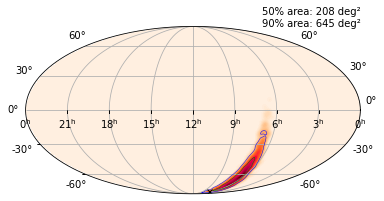

In [7]:
# Plot skymap

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.use('tkagg')
from ligo.skymap import postprocess
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import healpy as hp
from ligo.skymap.io import fits
from ligo.skymap import plot
from ligo.skymap import postprocess
from astropy.coordinates import SkyCoord
from astropy.time import Time
from matplotlib.pyplot import cm
import matplotlib


def my_cl(array,value):
    ratio=1.0
    arg = np.argsort(-array)
    total = np.sum(array)
    part=0.0
    for i in arg:
#        part = part + array[i]
        if array[i]<value:
            ratio = part/total
            break
        else:
            part = part + array[i]
    
    return ratio


nside=32
npix=hp.nside2npix(nside)
theta,phi = hp.pixelfunc.pix2ang(nside,np.arange(npix))
#ra_pix = phi
#de_pix = -theta + np.pi/2.0

deg2perpix = hp.nside2pixarea(nside, degrees=True)

#sector_data = np.loadtxt('Probabilities_1', skiprows=1)
#prob = np.loadtxt('Localization_after_autoencoder/GWOSC_files_from_autoencoder_final/Localization_preds/CNN_MDN_GW170823_test_NSIDE64.txt')
prob = probs[6]
#sector_id = sector_data[:,0]
#ra_min = sector_data[:,1]
#ra_max = sector_data[:,2]
#de_min = sector_data[:,3]
#e_max = sector_data[:,4]

#ra_min = np.loadtxt('RA_min_4096.txt')
#ra_max = np.loadtxt('RA_max_4096.txt')
#de_min = np.loadtxt('Dec_min_4096.txt')
#de_max = np.loadtxt('Dec_max_4096.txt')

#p = np.zeros(npix)
#for i in range(npix):
#    for j in range(len(prob)):
#        if ra_pix[i]>ra_min[j] and ra_pix[i]<ra_max[j] and de_pix[i]>de_min[j] and de_pix[i]<de_max[j]:
#            p[i] = prob[j]
            
#p = p/sum(p)


#hp.mollview(prob, title="Machine Learning Prob-Density",rot=(180,0))
#plt.savefig('PD.png')

cls = 100 * postprocess.find_greedy_credible_levels(prob)

ax = plt.axes(projection='astro hours mollweide')
ax.grid()
event_ra = ra_test[6]
event_de = dec_test[6]

value = hp.pixelfunc.get_interp_val(prob,event_de,event_ra)
projector  = hp.projector.MollweideProj()
#x1,y1 = projector.ang2xy(np.array([event_de,event_ra]))
img = ax.imshow_hpx(prob, vmin=prob.min(), vmax=prob.max(),cmap='cylon')
cs = ax.contour_hpx((cls, 'ICRS'),linewidths=0.5, levels=[0.5*np.sum(prob)*100,0.9*np.sum(prob)*100],colors=['green','blue'])
m = theta
cs = postprocess.contour(m, [50,90], degrees=True)
ax.plot_coord(SkyCoord(event_ra, event_de, unit='rad'), 'x',markeredgecolor='black', markersize=5)
text = []
cl = my_cl(prob,value)*100
pp = np.round([50,90]).astype(int)
#ii = np.round(np.searchsorted(np.sort(cls),[50,90]) * deg2perpix).astype(int)
ii_90 = np.sum(cls <= 90*np.sum(prob)) * hp.nside2pixarea(nside, degrees=True)
ii_50 = np.sum(cls <= 50*np.sum(prob)) * hp.nside2pixarea(nside, degrees=True)
ii = np.round([ii_50,ii_90]).astype(int)
for i, p in zip(ii, pp):
            # FIXME: use Unicode symbol instead of TeX '$^2$'
            # because of broken fonts on Scientific Linux 7.
            text.append(u'{:d}% area: {:d} deg²'.format(p, i, grouping=True))
ax.text(1, 1, '\n'.join(text), transform=ax.transAxes, ha='right')
#ax.figure.savefig('Localization_after_autoencoder/GWOSC_files_from_autoencoder_final/Localization_plots/CNN_MDN_GW170823_test_NSIDE64.png',dpi=150)
ax.figure.savefig('Preds_test_0.png',dpi=150)


In [2]:
import numpy as np
import h5py

f1 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_snr_series_GW170817_training_1.hdf', 'r')

#Get the HDF5 group
group1 = f1['omf_injection_snr_samples']

data_h1_1 = group1['h1_snr']

data_l1_1 = group1['l1_snr']

data_v1_1 = group1['v1_snr']


h1_real = np.zeros((10,410))

h1_imag = np.zeros((10,410))

for i in range(10):
    h1_real[i] = abs(data_h1_1[str(i)][()][1840:2250])


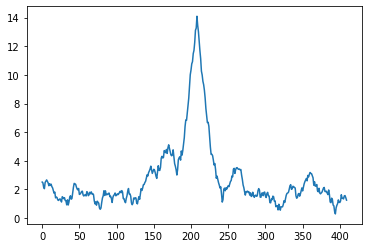

In [18]:
from matplotlib import pyplot as plt

plt.plot(h1_real[4])


In [8]:
f1.close()


In [9]:
f3 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_snr_series_GW170817_snr_test_injection_run_test_NSBH.hdf', 'r')

group3 = f3['omf_injection_snr_samples']

data_h1_3 = group3['h1_snr']
data_l1_3 = group3['l1_snr']
data_v1_3 = group3['v1_snr']


h1_test_real = np.zeros((10,410))
l1_test_real = np.zeros((10,410))
v1_test_real = np.zeros((10,410))

h1_test_imag = np.zeros((10,410))
l1_test_imag = np.zeros((10,410))
v1_test_imag = np.zeros((10,410))

h1_test_real = np.zeros((10,410))
h1_test_imag = np.zeros((10,410))

for i in range(10):
    h1_test_real[i] = abs(data_h1_3[str(i)][()][1840:2250])


In [10]:
f3.close()


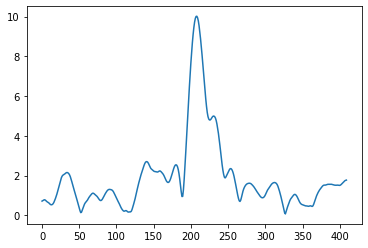

In [19]:
plt.plot(h1_test_real[4])


In [2]:
import numpy as np
import h5py 

f1 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_snr_series_GW170817_NSBH_train_52k.hdf', 'r')
f2 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_snr_series_GW170817_NSBH_train_30k.hdf', 'r')

h1_real_52k = abs(f1['h1_snr_series'][()])
l1_real_52k = abs(f1['l1_snr_series'][()])
v1_real_52k = abs(f1['v1_snr_series'][()])

h1_real_30k = abs(f2['h1_snr_series'][()])
l1_real_30k = abs(f2['h1_snr_series'][()])
v1_real_30k = abs(f2['h1_snr_series'][()])

h1_real = np.concatenate([h1_real_52k, h1_real_30k], axis=0)
l1_real = np.concatenate([l1_real_52k, l1_real_30k], axis=0)
v1_real = np.concatenate([v1_real_52k, v1_real_30k], axis=0)

h1_imag_52k = np.imag(f1['h1_snr_series'][()])
l1_imag_52k = np.imag(f1['l1_snr_series'][()])
v1_imag_52k = np.imag(f1['v1_snr_series'][()])

h1_imag_30k = np.imag(f2['h1_snr_series'][()])
l1_imag_30k = np.imag(f2['h1_snr_series'][()])
v1_imag_30k = np.imag(f2['h1_snr_series'][()])

h1_imag = np.concatenate([h1_imag_52k, h1_imag_30k], axis=0)
l1_imag = np.concatenate([l1_imag_52k, l1_imag_30k], axis=0)
v1_imag = np.concatenate([v1_imag_52k, v1_imag_30k], axis=0)

f1.close()
f2.close()


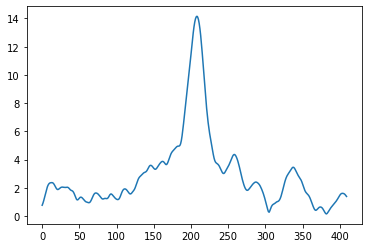

In [7]:
from matplotlib import pyplot as plt

plt.plot(h1_real_30k[1])


In [8]:
f1 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_GW170817_injection_run_parameters_NSBH_train_52k.hdf', 'r')
f2 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_GW170817_injection_run_parameters_NSBH_train_30k.hdf', 'r')


In [57]:
f1 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_GW170817_injection_run_parameters_NSBH_train_52k.hdf', 'r')
f2 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_GW170817_injection_run_parameters_NSBH_train_30k.hdf', 'r')
f3 = h5py.File('/fred/oz016/Chayan/SNR_time_series_sample_files/default_GW170817_injection_run_parameters_NSBH_train_42-47.hdf', 'r')


In [78]:
h1_snr_1 = f1['H1_SNR'][()]
h1_snr_2 = f2['H1_SNR'][0:30000][()]
h1_snr_3 = f3['H1_SNR'][()]

l1_snr_1 = f1['L1_SNR'][()]
l1_snr_2 = f2['L1_SNR'][0:30000][()]
l1_snr_3 = f3['L1_SNR'][()]

v1_snr_1 = f1['V1_SNR'][()]
v1_snr_2 = f2['V1_SNR'][0:30000][()]
v1_snr_3 = f3['V1_SNR'][()]


In [79]:
h1_snr = np.concatenate((h1_snr_1, h1_snr_2, h1_snr_3))
l1_snr = np.concatenate((l1_snr_1, l1_snr_2, l1_snr_3))
v1_snr = np.concatenate((v1_snr_1, v1_snr_2, v1_snr_3))


In [80]:
f1.close()
f2.close()
f3.close()


In [94]:
index = []
for i in range(94000):
    if((h1_snr[i] > 4 and l1_snr[i] > 4 and v1_snr[i] > 4)):
        index.append(i)


In [56]:
import numpy as np

ra_samples = np.array([0., 1.5, 2.0])
dec_samples = np.array([2., 0., -1.5])


In [57]:
index = np.where(np.logical_or(dec_samples > 1, dec_samples < -1))


In [59]:
ra_samples = np.delete(ra_samples, index)
dec_samples = np.delete(dec_samples, index)


In [60]:
ra_samples

array([1.5])

In [61]:
dec_samples

array([0.])